In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.basemap import Basemap
import xarray as xr
from matplotlib.colors import TwoSlopeNorm
from matplotlib.colors import LinearSegmentedColormap
from scipy.spatial import cKDTree
from scipy.interpolate import griddata
import glob
from datetime import datetime
import csv


In [2]:
df_statistics_all_years = pd.read_csv('/gpfs/work3/0/ai4nbs/hurry_wave/north_sea/05_postprocessing/YearSims/statistics_all_years.csv')
df_statistics_all_years.keys()



Index(['year', 'station', 'variable', 'statistic', 'benchmark', 'value'], dtype='object')

In [3]:
def plot_statistic_over_years(df, station, variable, statistic, benchmark='buoy', years=None, ax=None, **plot_kwargs):
    """
    Plots a given statistic for a given variable at a given station and benchmark for all years.

    Parameters:
        df (pd.DataFrame): DataFrame with columns ['year', 'station', 'variable', 'statistic', 'benchmark', 'value']
        station (str or np.str_): Station name
        variable (str): Variable name (e.g., 'point_hm0')
        statistic (str): Statistic to plot (e.g., 'mean', 'max')
        benchmark (str): Benchmark to filter (e.g., 'era5', 'buoy')
        years (list, optional): List of years to plot. If None, use all years in df.
        ax (matplotlib.axes.Axes, optional): Axis to plot on.
        **plot_kwargs: Additional keyword arguments for plt.plot.

    Returns:
        matplotlib.axes.Axes: The axis with the plot.
    """
    df_sel = df[
        (df['station'] == station) &
        (df['variable'] == variable) &
        (df['statistic'] == statistic) &
        (df['benchmark'] == benchmark)
    ]
    if years is not None:
        df_sel = df_sel[df_sel['year'].isin(years)]
    df_sel = df_sel.sort_values('year')
    x_years = df_sel['year']
    y_stats = df_sel['value']

    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(x_years, y_stats, marker='x', markersize=3, linestyle='-', **plot_kwargs)
    ax.set_xlabel('Year')
    ax.set_ylabel(f'{statistic} of {variable}')
    ax.set_title(f'{statistic} of {variable} at {station} ({benchmark}) over years')
    ax.grid(True)
    return ax

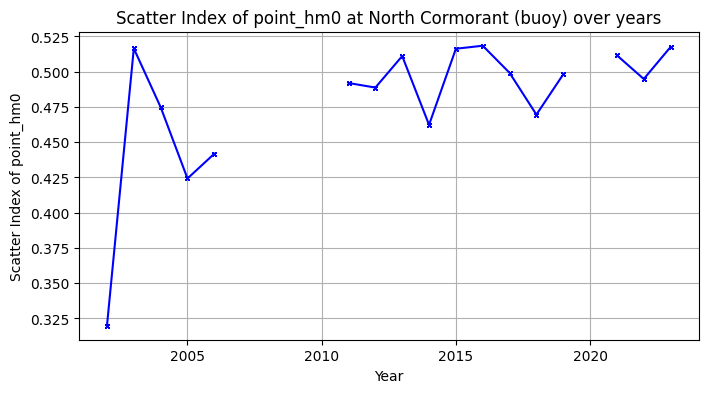

In [6]:
ax = plot_statistic_over_years(df_statistics_all_years, 'North Cormorant', 'point_hm0', 'Scatter Index', years=range(1991, 2024), color='blue')



In [34]:
from IPython.display import display, HTML

filtered_df = df_statistics_all_years[
    (df_statistics_all_years['station'] == 'Euro platform') &
    (df_statistics_all_years['variable'] == 'point_tp') &
    (df_statistics_all_years['statistic'] == 'Scatter Index') &
    (df_statistics_all_years['benchmark'] == 'buoy')
][['year', 'value']]

display(HTML(filtered_df.to_html(max_rows=30, notebook=True, index=False, 
                                table_id="scroll_table", 
                                classes="scroll-table")))
display(HTML("""
<style>
#scroll_table {
    display: block;
    max-height: 300px;
    overflow-y: scroll;
}
</style>
"""))

year,value
2023,0.100904
2023,0.100904
2022,0.120968
2023,0.100904
2022,0.120968
2021,0.237700
2023,0.100904
2022,0.120968
2021,0.237700
2020,0.138033
